# Import Stackup
This example shows how to import stackup file.

## Perform imports and define constants

Perform required imports.

In [1]:
import json
import toml
from pathlib import Path
import tempfile

from IPython.display import display
from ansys.aedt.core.examples.downloads import download_file
import pandas as pd
from pyedb import Edb

Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NG_MODE = False

Download the example PCB data.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")
file_edb = download_file(source="edb/ANSYS-HSD_V1.aedb", local_path=temp_folder.name)

## Load example layout.

In [4]:
edbapp = Edb(file_edb, edbversion=AEDT_VERSION)

C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `edbversion` is deprecated for method `Edb`; use `version` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)


PyEDB INFO: Star initializing Edb 10:30:33.043807


PyEDB INFO: Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.67.1


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: Database ANSYS-HSD_V1.aedb Opened in 2025.2


PyEDB INFO: Cell main Opened


PyEDB INFO: Builder was initialized.


PyEDB INFO: open_edb completed in 9.0580 seconds.


PyEDB INFO: EDB initialization completed in 9.1213 seconds.


## Review original stackup definition

Get original stackup definition in a dictionary. Alternatively, stackup definition can be exported in a json file by
edbapp.configuration.export()

In [5]:
data_cfg = edbapp.configuration.get_data_from_db(stackup=True)

PyEDB INFO: Getting data from layout database.


In [6]:
df = pd.DataFrame(data=data_cfg["stackup"]["layers"])
display(df)

,name,type,material,fill_material,thickness,roughness,etching
0,1_Top,signal,copper,Solder Resist,0.035mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
1,DE1,dielectric,Megtron4,,0.1mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
2,Inner1(GND1),signal,copper,Megtron4_2,0.017mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
3,DE2,dielectric,Megtron4_2,,0.088mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
4,Inner2(PWR1),signal,copper,Megtron4_2,0.017mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
5,DE3,dielectric,Megtron4,,0.1mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
6,Inner3(Sig1),signal,copper,Megtron4_3,0.017mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
7,Megtron4-1mm,dielectric,Megtron4_3,,1mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
8,Inner4(Sig2),signal,copper,Megtron4_3,0.017mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
9,DE5,dielectric,Megtron4,,0.1mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."


## Modify stackup

Modify top layer thickness

In [7]:
data_cfg["stackup"]["layers"][0]["thickness"] = 0.00005

Add a solder mask layer

In [8]:
data_cfg["stackup"]["layers"].insert(
    0, {"name": "soler_mask", "type": "dielectric", "material": "Megtron4", "fill_material": "", "thickness": 0.00002}
)

Review modified stackup

In [9]:
df = pd.DataFrame(data=data_cfg["stackup"]["layers"])
display(df.head(3))

,name,type,material,fill_material,thickness,roughness,etching
0,soler_mask,dielectric,Megtron4,,0.00002,NaN,NaN
1,1_Top,signal,copper,Solder Resist,0.00005,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."
2,DE1,dielectric,Megtron4,,0.1mm,"{'enabled': False, 'top': {'model': 'huray', '...","{'factor': '0', 'etch_power_ground_nets': Fals..."


Write stackup definition into a json file

In [10]:
file_cfg = Path(temp_folder.name) / "edb_configuration.json"
with open(file_cfg, "w") as f:
    json.dump(data_cfg, f, indent=4, ensure_ascii=False)

Equivalent toml file looks like below 

In [11]:
toml_string = toml.dumps(data_cfg)
print(toml_string)

[stackup]
[[stackup.materials]]
conductivity = 58000000.0
dielectric_loss_tangent = 0.0
magnetic_loss_tangent = 0.0
mass_density = 0.0
permittivity = 0.0
permeability = 0.0
poisson_ratio = 0.0
specific_heat = 0.0
thermal_conductivity = 0.0
youngs_modulus = 0.0
thermal_expansion_coefficient = 0.0
name = "copper"

[[stackup.materials]]
conductivity = 0.0
dielectric_loss_tangent = 0.02
magnetic_loss_tangent = 0.0
mass_density = 1900.0
permittivity = 4.4
permeability = 0.0
poisson_ratio = 0.28
specific_heat = 1150.0
thermal_conductivity = 0.294
youngs_modulus = 11000000000.0
thermal_expansion_coefficient = 1.5e-5
name = "FR4_epoxy"

[[stackup.materials]]
conductivity = 0.0
dielectric_loss_tangent = 0.005
magnetic_loss_tangent = 0.0
mass_density = 0.0
permittivity = 3.77
permeability = 0.0
poisson_ratio = 0.0
specific_heat = 0.0
thermal_conductivity = 0.0
youngs_modulus = 0.0
thermal_expansion_coefficient = 0.0
name = "Megtron4"

[[stackup.materials]]
conductivity = 0.0
dielectric_loss_tang

## Load stackup from json configuration file

In [12]:
edbapp.configuration.load(file_cfg, apply_file=True)

PyEDB INFO: Updating nets finished. Time lapse 0:00:00


PyEDB INFO: Updating components finished. Time lapse 0:00:00


PyEDB INFO: Creating pin groups finished. Time lapse 0:00:00


PyEDB INFO: Placing sources finished. Time lapse 0:00:00


PyEDB INFO: Applying materials finished. Time lapse 0:00:00.031931


PyEDB INFO: Updating stackup finished. Time lapse 0:00:09.118301


PyEDB INFO: Applying padstack definitions and instances completed in 0.0000 seconds.


PyEDB INFO: Applying S-parameters finished. Time lapse 0:00:00


PyEDB INFO: Applying package definitions finished. Time lapse 0:00:00


PyEDB INFO: Applying modeler finished. Time lapse 0:00:00


PyEDB INFO: Placing ports finished. Time lapse 0:00:00


PyEDB INFO: Placing terminals completed in 0.0000 seconds.


PyEDB INFO: Placing probes finished. Time lapse 0:00:00


PyEDB INFO: Applying operations completed in 0.0000 seconds.


Plot stackup

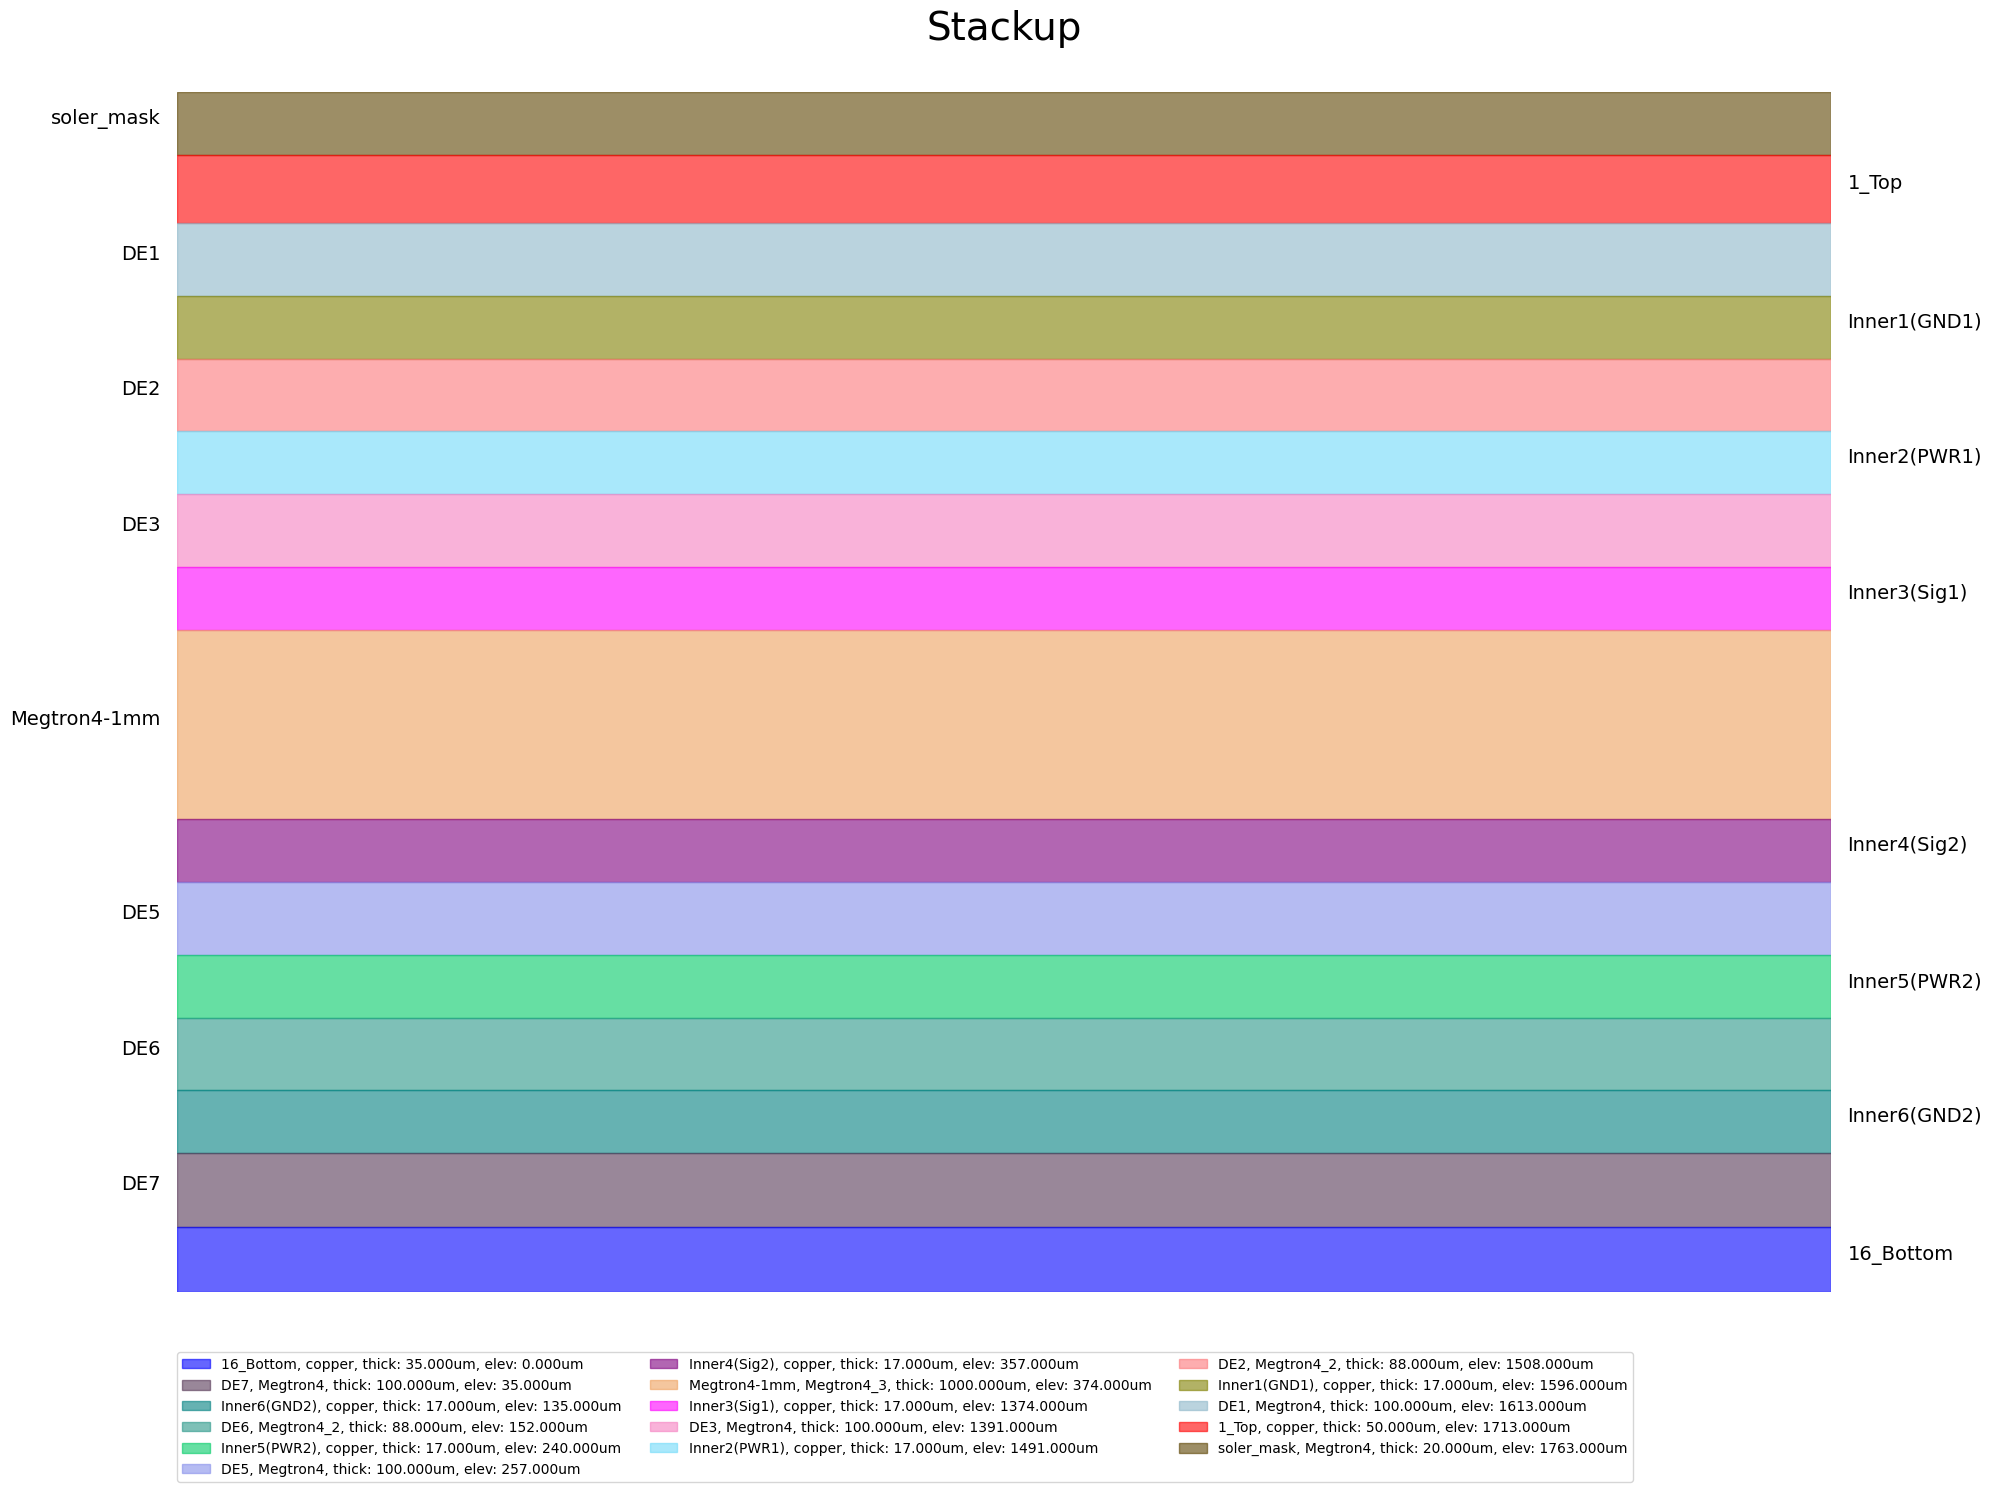

<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyaedt-examples\\pyaedt-examples\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [13]:
edbapp.stackup.plot()

Check top layer thickness

In [14]:
edbapp.stackup["1_Top"].thickness

5e-05

## Save and close Edb
The temporary folder will be deleted once the execution of this script is finished. Replace **edbapp.save()** with
**edbapp.save_as("C:/example.aedb")** to keep the example project.

In [15]:
edbapp.save()
edbapp.close()

PyEDB INFO: Save Edb file completed in 0.1104 seconds.


PyEDB INFO: Close Edb file completed in 0.0790 seconds.


True